Week 8 : Unstructured Data Pre Processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import necessary libraries
import cv2
import os
import json
import numpy as np
from skimage import feature
from matplotlib import pyplot as plt

In [3]:
#load the image(adjust the file path to your image)
image_path = '/content/drive/MyDrive/Data Engineering/Data/Raw/fruits.jpg'
image = cv2.imread(image_path)

In [4]:
type(image)

numpy.ndarray

In [6]:
image.shape

(425, 640, 3)

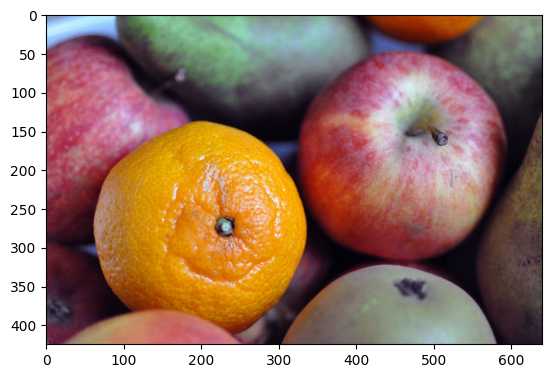

In [7]:
#convert the image from BGR to RGB format (OpenCV loads image in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis()
plt.show()

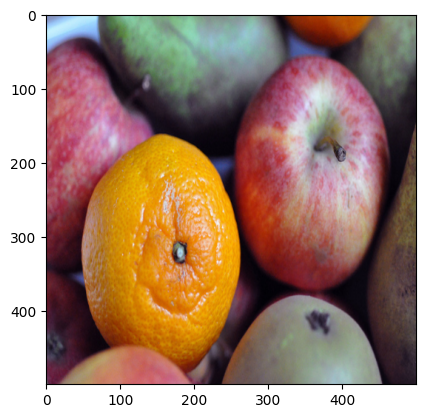

In [11]:
# Resize the image to 500x500 pixels
resized_image = cv2.resize(image_rgb, (500, 500))

# Save the preprocessed image
cv2.imwrite('/content/drive/MyDrive/Data Engineering/Data/processed/resized_image.jpg', resized_image)

# Display the resized image using matplotlib
plt.imshow(resized_image)
plt.axis()
plt.show()

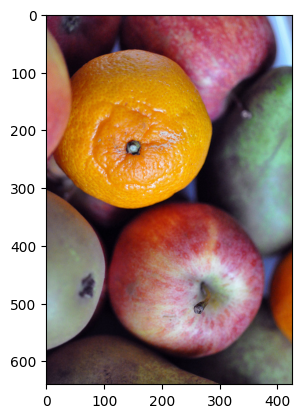

In [12]:
# Rotate the image (90 degrees clockwise)
rotated_image_90 = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

# Save the rotated image
cv2.imwrite('/content/drive/MyDrive/Data Engineering/Data/processed/rotated_image_90.jpg', rotated_image_90)

# Display the rotated image using matplotlib
plt.imshow(rotated_image_90)
plt.axis()
plt.show()

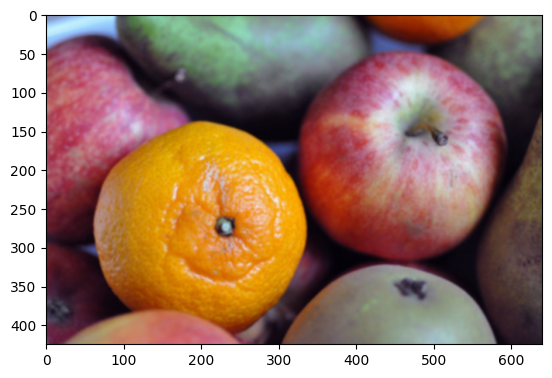

In [13]:
# Denoise the image using Gaussian blur
denoised_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Save the denoised image
cv2.imwrite('/content/drive/MyDrive/Data Engineering/Data/processed/denoised_image.jpg', denoised_image)

# Display the denoised image using matplotlib
plt.imshow(denoised_image)
plt.axis()
plt.show()

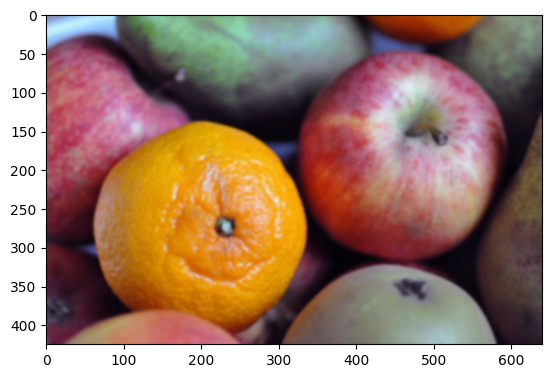

In [14]:
# Denoise the image using Gaussian blur
denoised_image = cv2.GaussianBlur(image_rgb, (7, 7), 0)

# Save the denoised image
cv2.imwrite('/content/drive/MyDrive/Data Engineering/Data/processed/denoised_image.jpg', denoised_image)

# Display the denoised image using matplotlib
plt.imshow(denoised_image)
plt.axis()
plt.show()

Combined Filtering

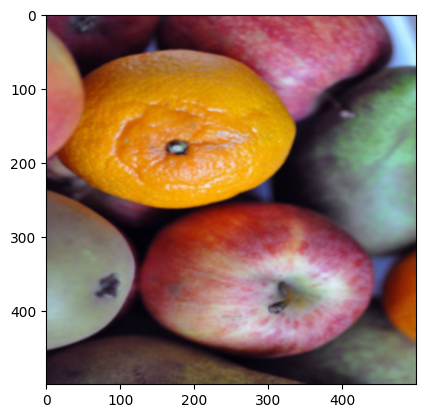

In [15]:
#apply resizing, rotation and denoising to the image and save it as processed image
image = cv2.imread('/content/drive/MyDrive/Data Engineering/Data/Raw/fruits.jpg')

# Convert the image from BGR to RGB format (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#resize thesame image to 500x500 pixel
image_rgb = cv2.resize(image_rgb, (500, 500))

# Rotate the image (90 degrees clockwise)
image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

# Denoise the image using Gaussian blur
image_rgb = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Save the processed image
cv2.imwrite('/content/drive/MyDrive/Data Engineering/Data/processed/processed_image.jpg', image_rgb)

# Display the denoised image using matplotlib
plt.imshow(image_rgb)
plt.axis()
plt.show()

Image Annotation

Manually add metadata such as keywords and description

In [16]:
# metadata for the processed fruit image
metadata = {
    "processed_image.jpg": {
        "keywords": ["Fruits", "Healthy food", "green"],
        "description": "A processed fruit image with resizing, rotation, and denoising applied."
    }
}

In [17]:
# Save metadata to a JSON file
with open('/content/drive/MyDrive/Data Engineering/Data/processed/image_metadata.json', 'w') as json_file:
    json.dump(metadata, json_file, indent=4)

- Metadata Structure: A dictionary is created with the image name as the key, containing keywords and a description.
- Saving: The metadata is saved as a JSON file for later use.

# Image Feature Extraction
- Extract features such as mean and norm intensity

In [18]:
import cv2
from skimage import feature
import numpy as np

In [19]:
# Load the processed fruit image, earlier saved
processed_image = cv2.imread('/content/drive/MyDrive/Data Engineering/Data/processed/processed_image.jpg')

In [20]:
# Calculate mean and norm of pixel intensities
mean_intensity = np.mean(processed_image)
norm_intensity = np.linalg.norm(processed_image)

In [21]:
mean_intensity

np.float64(105.42592133333333)

In [22]:
norm_intensity

np.float64(107316.0217162377)

In [23]:
print(f'The mean intensity is {mean_intensity}, and the norm intensity is {norm_intensity}')

The mean intensity is 105.42592133333333, and the norm intensity is 107316.0217162377


Extract Shape features such as
- Area
- Perimeter
- Centroid
- Bounding box

In [24]:
# Convert to grayscale
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Find contours from the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour to calculate the shape features
for contour in contours:
    # Area
    area = cv2.contourArea(contour)

    # Perimeter (arc length)
    perimeter = cv2.arcLength(contour, True)  # True means the contour is closed

    # Centroid (center of mass)
    moments = cv2.moments(contour)
    if moments["m00"] != 0:
        cX = int(moments["m10"] / moments["m00"])
        cY = int(moments["m01"] / moments["m00"])
    else:
        cX, cY = 0, 0

    # Bounding box (smallest rectangle that contains the object)
    x, y, w, h = cv2.boundingRect(contour)


    # Print the shape features
    print(f"Area: {area}, Perimeter: {perimeter}, Centroid: ({cX}, {cY}), Bounding Box: ({x}, {y}), Width: {w}, Height: {h}")

Area: 0.0, Perimeter: 18.485281229019165, Centroid: (0, 0), Bounding Box: (302, 396), Width: 9, Height: 3
Area: 11.0, Perimeter: 64.42640578746796, Centroid: (321, 395), Bounding Box: (310, 391), Width: 20, Height: 10
Area: 15.5, Perimeter: 115.982754945755, Centroid: (308, 398), Bounding Box: (300, 386), Width: 23, Height: 20
Area: 14.5, Perimeter: 105.154327750206, Centroid: (75, 375), Bounding Box: (66, 367), Width: 27, Height: 16
Area: 6.5, Perimeter: 67.69848418235779, Centroid: (322, 364), Bounding Box: (313, 361), Width: 18, Height: 16
Area: 5.5, Perimeter: 27.55634868144989, Centroid: (94, 357), Bounding Box: (92, 355), Width: 7, Height: 11
Area: 8.0, Perimeter: 64.42640578746796, Centroid: (82, 354), Bounding Box: (72, 350), Width: 21, Height: 17
Area: 104.0, Perimeter: 643.0092276334763, Centroid: (84, 343), Bounding Box: (0, 253), Width: 121, Height: 202
Area: 0.5, Perimeter: 11.41421353816986, Centroid: (231, 238), Bounding Box: (231, 238), Width: 6, Height: 2
Area: 18.0, P

In [25]:
#collect all the shape features as a dictionary
shape_feature = {
        "area": area,
        "perimeter": perimeter,
        "centroid": (cX, cY),
        "bounding_box": (x, y, w, h)
    }

In [26]:
# Collect all the features extracted from the processed_image and store as a meta data
features_extracted = {
    "mean_intensity": mean_intensity,  # Mean intensity calculated earlier
    "norm_intensity": norm_intensity,  # Norm intensity calculated earlier
    "shape_features": shape_feature  # List to hold shape features for each object
}

In [27]:
# Save the features to a JSON file
with open('image_features.json', 'w') as json_file:
    json.dump(features_extracted, json_file, indent=4)

Text Pre-processing

In [28]:
#import necessary library
import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [29]:
# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#Load the content of the specified file
with open('/content/101551') as file:
  document_101551 = file.read()